In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.defaults = 'plotly_white'

In [5]:
data = pd.read_csv("supermarket_sales.csv",encoding = "latin-1")

In [7]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
data[data.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

In [19]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [21]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,2,2019


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   int32         
 12  Payment                  1000 non-n

In [25]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,14.910000,307.58738,4.761905e+00,15.379369,6.97270,1.993000,2019.0
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.000000,10.17000,4.761905e+00,0.508500,4.00000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,12.000000,118.49750,4.761905e+00,5.924875,5.50000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,15.000000,241.76000,4.761905e+00,12.088000,7.00000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,18.000000,448.90500,4.761905e+00,22.445250,8.50000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,20.000000,993.00000,4.761905e+00,49.650000,10.00000,3.000000,2019.0
std,26.494628,2.923431,11.708825,245.885335,NaN,3.186857,234.17651,6.131498e-14,11.708825,1.71858,0.835254,0.0


In [27]:
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Quantity'] >= (Q1 - 1.5 * IQR)) & (data['Quantity'] <= (Q3 + 1.5 * IQR))]

In [29]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,14.910000,307.58738,4.761905e+00,15.379369,6.97270,1.993000,2019.0
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.000000,10.17000,4.761905e+00,0.508500,4.00000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,12.000000,118.49750,4.761905e+00,5.924875,5.50000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,15.000000,241.76000,4.761905e+00,12.088000,7.00000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,18.000000,448.90500,4.761905e+00,22.445250,8.50000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,20.000000,993.00000,4.761905e+00,49.650000,10.00000,3.000000,2019.0
std,26.494628,2.923431,11.708825,245.885335,NaN,3.186857,234.17651,6.131498e-14,11.708825,1.71858,0.835254,0.0


# total sales per branch

In [32]:
data['Total Sales'] = data['Quantity'] * data['Unit price']

In [36]:
Branch_sales = data.groupby('Branch')['Total Sales'].sum()

In [42]:
(Branch_sales)

Branch
A    101143.21
B    101140.64
C    105303.53
Name: Total Sales, dtype: float64

In [88]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Year,Total Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,3,2019,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,3,2019,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,604.17


In [90]:
# Here we see that cogs = Total sales

# Total sales by Months

In [65]:
monthly_sales = data.groupby(['Month', 'Branch'])['Total Sales'].sum().unstack()

In [67]:
monthly_sales

Branch,A,B,C
Month,,,
1,36839.17,35405.77,38509.22
2,28438.21,32785.02,31366.65
3,35865.83,32949.85,35427.66


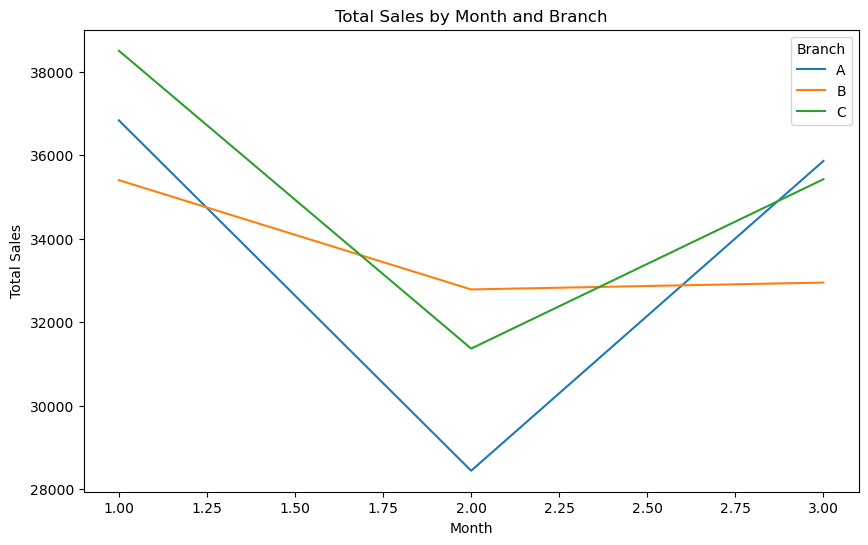

In [69]:
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title("Total Sales by Month and Branch")
plt.ylabel("Total Sales")
plt.show()

# Category Insights

In [74]:
category_sales = data.groupby('Product line').agg({'Quantity': 'sum', 'Total Sales': 'sum'}).reset_index()
category_sales_sorted = category_sales.sort_values(by='Total Sales', ascending=False)

In [76]:
category_sales_sorted 

,Product line,Quantity,Total Sales
2,Food and beverages,952,53471.28
5,Sports and travel,920,52497.93
0,Electronic accessories,971,51750.03
1,Fashion accessories,902,51719.90
4,Home and lifestyle,911,51297.06
3,Health and beauty,854,46851.18


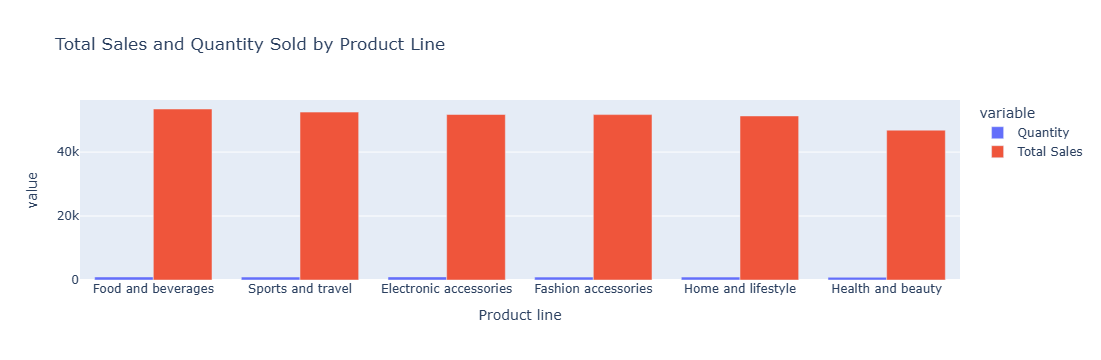

In [80]:
fig = px.bar(category_sales_sorted, 
             x='Product line', 
             y=['Quantity', 'Total Sales'],
             title='Total Sales and Quantity Sold by Product Line',
             labels={'Quantity': 'Quantity Sold', 'Total': 'Total Sales'},
             barmode='group')

fig.show()

# customer Insights

In [82]:
payment_method_analysis = data.groupby(['Branch', 'Payment'])['Total Sales'].sum().unstack()

In [84]:
payment_method_analysis

Payment,Cash,Credit card,Ewallet
Branch,,,
A,32172.62,31518.81,37451.78
B,33656.63,35566.53,31917.48
C,41034.15,28883.30,35386.08


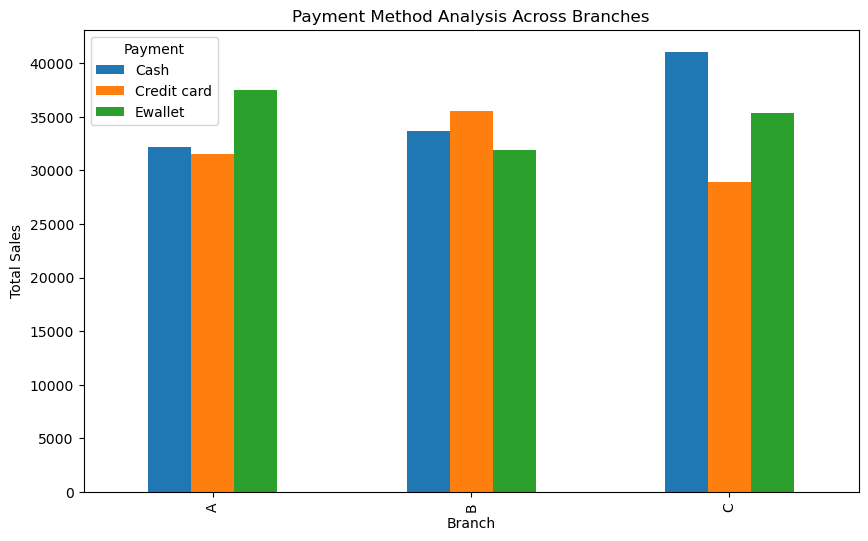

In [86]:
payment_method_analysis.plot(kind='bar', figsize=(10, 6))
plt.title("Payment Method Analysis Across Branches")
plt.ylabel("Total Sales")
plt.show()

# Basic Predictive Modeling

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
X = data[['Quantity', 'Unit price', 'Branch', 'Product line']]
X = pd.get_dummies(X, drop_first=True) 
y = data['Total Sales']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [102]:
Mae = mean_absolute_error(y_test, y_pred)
Mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {Mae}")
print(f"Mean Squared Error: {Mse}")

Mean Absolute Error: 56.44024770190222
Mean Squared Error: 5755.595115924297


# Decision Tree 

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [124]:
X = data[['Quantity', 'Unit price', 'Branch', 'Product line']]
X = pd.get_dummies(X, drop_first=True)  
y = data['Total Sales']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [130]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 6.4009499999999955
Mean Squared Error: 102.85315749999997


In [ ]:
''' Decision tree model performs better because both of the MAE and MSE are much lower than the Linear Regression model 
that indicating better prediction Accuracy. so that Decision Tree model is better choice in this scenario'''

# Insights and Recommendations

In [108]:
top_performing_branches = branch_sales.sort_values(ascending=False).head()

In [110]:
top_performing_branches

Branch
C    105303.53
A    101143.21
B    101140.64
Name: Total Sales, dtype: float64

In [112]:
high_revenue_categories = category_sales_sorted.head()

In [114]:
high_revenue_categories

,Product line,Quantity,Total Sales
2,Food and beverages,952,53471.28
5,Sports and travel,920,52497.93
0,Electronic accessories,971,51750.03
1,Fashion accessories,902,51719.90
4,Home and lifestyle,911,51297.06


# Recommendations

In [ ]:
 '''
1. Target promotional campaigns for high-revenue product categories.
2. Focus on branch-specific strategies to increase sales in underperforming branches because 
there is not much differece in terms of sales in all three branches
3. Consider offering discounts for payment methods with lower popularity(like - Credit card) to increase usage.
'''

# checking for most widely used payment method

In [133]:
payment_counts = data['Payment'].value_counts()

In [135]:
payment_counts

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

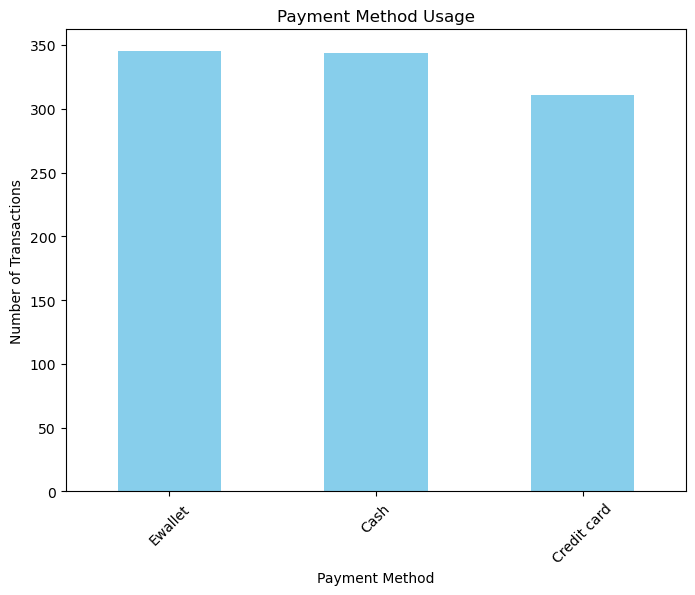

In [137]:
payment_counts.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Payment Method Usage')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()